<a href="https://colab.research.google.com/github/nicholicaron/FraudBuster/blob/main/FraudBuster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNN-Based Real-Time Fraud Detection System (IEEE-CIS Dataset)

## Project Overview

This project implements a Graph Neural Network (GNN) based system for fraud detection using the IEEE-CIS Fraud Detection dataset. The core idea is to represent transactions and their relationships as a graph, allowing the GNN to learn complex patterns indicative of fraudulent activity that traditional methods might miss. By modeling connections based on shared entities (cards, emails, devices), temporal proximity, and feature similarity, the system aims to identify sophisticated fraud schemes.

The project covers:
1.  **Data Preprocessing:** Handling missing values, feature engineering, encoding categorical features, and normalizing numerical data from the IEEE-CIS dataset.
2.  **Graph Construction:** Transforming tabular transaction data into a heterogeneous graph where transactions are nodes and edges represent various relationships.
3.  **GNN Architecture:** Designing a `HeteroGNN` using PyTorch Geometric, capable of processing different types of relationships (edge types).
4.  **Model Training & Evaluation:** Training the GNN on labeled data, handling class imbalance, and evaluating performance using fraud-detection-specific metrics (AUCPR, F1-score, Precision, Recall).
5.  **Real-Time Considerations (Conceptual):** Discussing the architectural aspects required for deploying such a system in a real-time environment.

## Tech Stack & Tools

*   **Programming Language:** Python 3.x
*   **Core Libraries:**
    *   **PyTorch:** For building and training neural networks.
    *   **PyTorch Geometric (PyG):** For creating and working with graph neural networks.
    *   **Pandas:** For data manipulation and analysis.
    *   **NumPy:** For numerical operations.
    *   **Scikit-learn:** For preprocessing (scaling, encoding), KNN, and evaluation metrics.
*   **Data Visualization:** Matplotlib, Seaborn (for confusion matrix).
*   **Dataset:** [IEEE-CIS Fraud Detection Dataset](https://www.kaggle.com/c/ieee-fraud-detection) (requires download from Kaggle).

## Key Concepts & System Flow

### 1. High-Level System Flow

The system processes transactions by first transforming them into a graph structure and then using a GNN to predict fraud.

[![](https://mermaid.ink/img/pako:eNqNVW1v2jAQ_iuWp01Mcl-SkACpNAmSvlPala4fBtXkJUdqNTiR43RlVf_7HJuEMCZ1QQJ899xzd8_ZziuOshiwjxNB80d0F845Us9wdkt_oTtBeUEjyTKOQiopCqb3xQPa2_uCRp1xRmP0CV2BSEB7Px-Z2JEGBJ0bAbnIIigKxhOFPAEqSwHomCeMAwhlrUMCHRJ2TnURQcYLKUqdt0IYTFH-XNcoKOMq-IblkComNKstqDY9mJDqiZkA08H4dmMNf8gqZmYSVtWbts460zxl0uQ4uKfpwR0Usi6zes4UrinBqFIFHhvCzulkgq6UommDaQevURWFAQ2FZAulcKFJdAjE2jWVmYBOZ21CDe_nmg94vCPNOV-AAB7BRpvG9P_iXMwmsD38qRRAl0aiy9ZgkQa-tFu81KBxJ1xxumQRMgp_y2MqAR2gaV1qoBjrAdex40qYryWI1b_laEF3fBtNzThY1XdrHI0OOwlNhYtMbDBtjq3xaYv2ns5OBC1jNI2q5AcohIgVqp-H3fGEm25a23aNu9DOncE12_7jR6X-Kq02W1VilFLB5Mr41KIoQliguNqGC5am_ofQ7brWiKgDlD2B_8G1reAwXC_3frFYPvp2_nL0F0E9T8PhOE636zUcvZN-MBy-y7HUOhuGnjPoeq0qnF7ovl9FoQdpGPpDO3Q2DF7XGtnH_2JocaAhudBatInRiAQkJGfkkozrPrf860NJ6unqPrYQu5utaG1HgzmtE5vPxnHO81Ku776CXJdSLcdZwtSZZ9lEUR5to5lkNB2rfFSQoTp-z_qYWOSE8cY-gRc5pisQ18IQ1o1p4xbhGUgQmbpSny0Uqe9RmkVPW4irIrlRvz-O4wTuVjlY5G-LvWOZkGGSCEjUobZI1YTu0kIxSMpSkwMT9VJhMfbVXQ4EL0EsabXEr1X2OZaPsIQ59tXfmIqnOZ7zNxWTU_49y5Z1mMjK5BH7C5oWalXqeyRkVF0iy8aqTk4MIshKLrHvOn1Ngv1X_IJ9Z2DtO06_13M9p9vzXI_gFfYH9r7b9dQ-dyx70O_b_TeCf-ush_sD-9Dtez3X9QaHA_WXYIiZmveVeVHq9-XbH-FbT1k?type=png)](https://mermaid.live/edit#pako:eNqNVW1v2jAQ_iuWp01Mcl-SkACpNAmSvlPala4fBtXkJUdqNTiR43RlVf_7HJuEMCZ1QQJ899xzd8_ZziuOshiwjxNB80d0F845Us9wdkt_oTtBeUEjyTKOQiopCqb3xQPa2_uCRp1xRmP0CV2BSEB7Px-Z2JEGBJ0bAbnIIigKxhOFPAEqSwHomCeMAwhlrUMCHRJ2TnURQcYLKUqdt0IYTFH-XNcoKOMq-IblkComNKstqDY9mJDqiZkA08H4dmMNf8gqZmYSVtWbts460zxl0uQ4uKfpwR0Usi6zes4UrinBqFIFHhvCzulkgq6UommDaQevURWFAQ2FZAulcKFJdAjE2jWVmYBOZ21CDe_nmg94vCPNOV-AAB7BRpvG9P_iXMwmsD38qRRAl0aiy9ZgkQa-tFu81KBxJ1xxumQRMgp_y2MqAR2gaV1qoBjrAdex40qYryWI1b_laEF3fBtNzThY1XdrHI0OOwlNhYtMbDBtjq3xaYv2ns5OBC1jNI2q5AcohIgVqp-H3fGEm25a23aNu9DOncE12_7jR6X-Kq02W1VilFLB5Mr41KIoQliguNqGC5am_ofQ7brWiKgDlD2B_8G1reAwXC_3frFYPvp2_nL0F0E9T8PhOE636zUcvZN-MBy-y7HUOhuGnjPoeq0qnF7ovl9FoQdpGPpDO3Q2DF7XGtnH_2JocaAhudBatInRiAQkJGfkkozrPrf860NJ6unqPrYQu5utaG1HgzmtE5vPxnHO81Ku776CXJdSLcdZwtSZZ9lEUR5to5lkNB2rfFSQoTp-z_qYWOSE8cY-gRc5pisQ18IQ1o1p4xbhGUgQmbpSny0Uqe9RmkVPW4irIrlRvz-O4wTuVjlY5G-LvWOZkGGSCEjUobZI1YTu0kIxSMpSkwMT9VJhMfbVXQ4EL0EsabXEr1X2OZaPsIQ59tXfmIqnOZ7zNxWTU_49y5Z1mMjK5BH7C5oWalXqeyRkVF0iy8aqTk4MIshKLrHvOn1Ngv1X_IJ9Z2DtO06_13M9p9vzXI_gFfYH9r7b9dQ-dyx70O_b_TeCf-ush_sD-9Dtez3X9QaHA_WXYIiZmveVeVHq9-XbH-FbT1k)

### 2. Graph Construction Strategy

Transactions are represented as nodes. Edges define relationships between them:

    Node Type: transaction

    Edge Types (Examples):

        shared_card_identity: Transactions sharing the same (hashed/combined) card details.

        shared_email_P: Transactions with the same payer email domain.

        shared_device_info: Transactions originating from the same device fingerprint.

        temporal_proximity: Transactions occurring within a short time window of each other.

        similar_amount: Transactions with numerically similar transaction amounts (identified via k-NN).

[![](https://mermaid.ink/img/pako:eNpdklFP6yAUx78KOcZEE7a0QNeNJb64-KQ3N9qne2saUthKbKGhTDeXfXfZaucmTxz-v_M_Bzg7KK1UwGHlRFuhx-fcoLCy-P9N5oTpROm1NSi-ff0WyKVATgK9FOhJYJcCOwnJpZAchKE8Go1QVwmnZFEKJwstlfHab8P5XWhifs551bTWibpond3o5kTRgSJnblK961IV2ixtT7GBokcq5NfCFaKxa-N7IhkIduajGqHr4m9PxPOh8-tr9OK3tTYrZMLDdv1pWYuuW6gl8j_3_RNktNR1za_uF-kDJbjzzr4pfkUp_d6PPrT0FSftZn5mFOrhjOCM4ozhLPltOgccflNL4N6tFYZGudBrCGF3MMnBV6pROfCwlcK95ZCbfchphflnbTOkObteVcCXou5CtG6l8GqhRZiTH0QZqdz94aWAT48OwHewAT6ZjQkhNKWzCWERoQzDFjiLxjQmbDJjU8JIPE2TPYbPY81oHKIoLEqnJKFplGJQUnvrnvr5PI7p_guKUtJh?type=png)](https://mermaid.live/edit#pako:eNpdklFP6yAUx78KOcZEE7a0QNeNJb64-KQ3N9qne2saUthKbKGhTDeXfXfZaucmTxz-v_M_Bzg7KK1UwGHlRFuhx-fcoLCy-P9N5oTpROm1NSi-ff0WyKVATgK9FOhJYJcCOwnJpZAchKE8Go1QVwmnZFEKJwstlfHab8P5XWhifs551bTWibpond3o5kTRgSJnblK961IV2ixtT7GBokcq5NfCFaKxa-N7IhkIduajGqHr4m9PxPOh8-tr9OK3tTYrZMLDdv1pWYuuW6gl8j_3_RNktNR1za_uF-kDJbjzzr4pfkUp_d6PPrT0FSftZn5mFOrhjOCM4ozhLPltOgccflNL4N6tFYZGudBrCGF3MMnBV6pROfCwlcK95ZCbfchphflnbTOkObteVcCXou5CtG6l8GqhRZiTH0QZqdz94aWAT48OwHewAT6ZjQkhNKWzCWERoQzDFjiLxjQmbDJjU8JIPE2TPYbPY81oHKIoLEqnJKFplGJQUnvrnvr5PI7p_guKUtJh)

### 3. GNN Architecture (HeteroGNN)

A Heterogeneous GNN (HeteroConv in PyG) is used to process the graph with multiple edge types. Each edge type can have its own message passing mechanism (e.g., using SAGEConv or GATConv). The information from different relationship types is then aggregated.

[![](https://mermaid.ink/img/pako:eNqVVm2P2jgQ_isjV5VaXUAkEF6CVKldur1KW1pd0X24ZbXyJiZYJHZkO3twiP_eySsO3KraiA8z5plnhvEzE44klBEjAYkVzbawWqwF4PNVZLm5ZdTkiun7JUKg8aAHK0WFpqHhUugH6PU-IJ4bTpM7LhhV72oPKhfu6IEp-AM-YsQzLaLez9eiSqTzpyrzl-WyxGm4R7OK0Q8VqHgirliZEVafzqclzP0q7r_nBiuGjZJpt5iqvj-ZYUreSPHsHo9npy7NPZ3agjpFWWGPC2YoT7C82gjgkse1yu2WfPdX95uioWWL3aq3n9MnFkVcxHU7v-n4B9X68XMUs9UhY-49nkBxhBi8gPY8ANaP-w7oLVUsegypih7mL-X6X2rvBWqvoTYszaSiySt5ly_wLgPo9_uXZFc_uOT8GMeKxdQw99iY2M3Tb2K9i9jfwJcvw5mIzs7ZevsW_uY6p0lygISLnS0TeEpkuAMjgRsNUSWVTuhqyzXgJ5WKQShFyDKDXEB1LZhCfr1WgkWCooMhFfDEwCge7g4dQjv7hdYb0c6hzsv2WcJDbqq6Ux5vDTLnmmFFOmfaAbkxTABPEccieygu05yn2X13tnHMF0pmMjfvrUZa2DJ2yfamHJnvqhrcI2oCbnNltjiO5_kHqaCebAQ0F99eS7OrrHEv6ZutMK8RV-lK1C0X7cYq7c6-asq3UGVURXAnY7zfZutUHor8VtE8gp8hXu1Du1Hwin6aAzY8rvwwQfkt2Aa4LId_w5MkeDOYDJk7drRRcseCN8PhsLZ7__LIbAMv288v4jMlQ6Z1tcMqFgy7cV9Fggp8_lRqtmJICk3gLDDxKppK6TbRYORNWwrf97sUbrZvDiJabC9FDwH44Jdts8i7ryLHbn_dwHkXbYnBsXTnWBfpXAvC7mWH0JZ926sO4mp3OVcb6epk6ZwXjmNtUquNc-LgS5lHJDAqZw5JmUpp4ZJjkX1NcFZStiYBmhFVuzVZixPGZFT8I2XahCmZx1sSbGii0cuzCFMuOMXlkranCieKqRuZC0MCz_dKEhIcyZ4Es0l_NB4Nx8PBbOqORv7QIQcSDCd9f-aNp_54NhuNvens5JD_yqyD_nQymuEz9GYTbzBwJw5hETdSfav-aJT_N06_AKcNwds?type=png)](https://mermaid.live/edit#pako:eNqVVm2P2jgQ_isjV5VaXUAkEF6CVKldur1KW1pd0X24ZbXyJiZYJHZkO3twiP_eySsO3KraiA8z5plnhvEzE44klBEjAYkVzbawWqwF4PNVZLm5ZdTkiun7JUKg8aAHK0WFpqHhUugH6PU-IJ4bTpM7LhhV72oPKhfu6IEp-AM-YsQzLaLez9eiSqTzpyrzl-WyxGm4R7OK0Q8VqHgirliZEVafzqclzP0q7r_nBiuGjZJpt5iqvj-ZYUreSPHsHo9npy7NPZ3agjpFWWGPC2YoT7C82gjgkse1yu2WfPdX95uioWWL3aq3n9MnFkVcxHU7v-n4B9X68XMUs9UhY-49nkBxhBi8gPY8ANaP-w7oLVUsegypih7mL-X6X2rvBWqvoTYszaSiySt5ly_wLgPo9_uXZFc_uOT8GMeKxdQw99iY2M3Tb2K9i9jfwJcvw5mIzs7ZevsW_uY6p0lygISLnS0TeEpkuAMjgRsNUSWVTuhqyzXgJ5WKQShFyDKDXEB1LZhCfr1WgkWCooMhFfDEwCge7g4dQjv7hdYb0c6hzsv2WcJDbqq6Ux5vDTLnmmFFOmfaAbkxTABPEccieygu05yn2X13tnHMF0pmMjfvrUZa2DJ2yfamHJnvqhrcI2oCbnNltjiO5_kHqaCebAQ0F99eS7OrrHEv6ZutMK8RV-lK1C0X7cYq7c6-asq3UGVURXAnY7zfZutUHor8VtE8gp8hXu1Du1Hwin6aAzY8rvwwQfkt2Aa4LId_w5MkeDOYDJk7drRRcseCN8PhsLZ7__LIbAMv288v4jMlQ6Z1tcMqFgy7cV9Fggp8_lRqtmJICk3gLDDxKppK6TbRYORNWwrf97sUbrZvDiJabC9FDwH44Jdts8i7ryLHbn_dwHkXbYnBsXTnWBfpXAvC7mWH0JZ926sO4mp3OVcb6epk6ZwXjmNtUquNc-LgS5lHJDAqZw5JmUpp4ZJjkX1NcFZStiYBmhFVuzVZixPGZFT8I2XahCmZx1sSbGii0cuzCFMuOMXlkranCieKqRuZC0MCz_dKEhIcyZ4Es0l_NB4Nx8PBbOqORv7QIQcSDCd9f-aNp_54NhuNvens5JD_yqyD_nQymuEz9GYTbzBwJw5hETdSfav-aJT_N06_AKcNwds)

## Future Enhancements & Considerations

1. **Scalability**: For larger datasets, use Approximate Nearest Neighbors (ANN) libraries (e.g., FAISS) for similarity edge creation. Explore distributed GNN training frameworks.

2. **Dynamic Graph Handling**: Integrate with graph databases (Neo4j, TigerGraph) for efficient storage, querying, and updates in a real-time production environment.

3. **Advanced Feature Engineering**: Incorporate graph-native features like node centrality, clustering coefficients, or motif counts.

4. **Interpretability**: Explore advanced GNN explanation techniques suitable for heterogeneous graphs to understand model decisions.

5. **Hyperparameter Optimization**: Use tools like Optuna or Ray Tune for systematic hyperparameter tuning.

6. **Production Deployment**: Package the model and inference logic for serving using frameworks like TorchServe, Triton Inference Server, or custom FastAPI endpoints.

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [2]:
import torch
print(torch.__version__)

2.6.0+cu124


In [3]:
import torch

# Determine PyTorch and CUDA versions
TORCH_VERSION = torch.__version__.split('+')[0] # e.g., "2.1.0"
CUDA_VERSION = ""
if torch.cuda.is_available():
    # Format CUDA version for PyG wheels (e.g., "cu118", "cu121")
    # torch.version.cuda might be "11.8", "12.1", etc.
    cuda_v_major_minor = torch.version.cuda.split('.')
    CUDA_VERSION = f"cu{cuda_v_major_minor[0]}{cuda_v_major_minor[1]}"
else:
    CUDA_VERSION = "cpu"

print(f"PyTorch version: {TORCH_VERSION}")
print(f"CUDA version for PyG wheels: {CUDA_VERSION}")

# Install PyG's core compiled libraries
# Note: These have to be compatible with torch_geometric version,
# This command usually gets the latest compatible.
!pip install pyg_lib torch_scatter torch_sparse torch_cluster -f https://data.pyg.org/whl/torch-{TORCH_VERSION}+{CUDA_VERSION}.html

# Verify (optional, but good practice)
try:
    import pyg_lib
    print("pyg_lib installed successfully.")
except ImportError:
    print("pyg_lib installation failed or not found.")
try:
    import torch_sparse
    print("torch_sparse installed successfully.")
except ImportError:
    print("torch_sparse installation failed or not found.")

import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
!pip install torch_geometric
from torch_geometric.data import Data, HeteroData
from torch_geometric.nn import SAGEConv, HeteroConv, Linear # Using SAGEConv for its efficiency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
!pip install faiss-gpu-cu12
import faiss # For feature similarity edges
from torch_geometric.loader import NeighborLoader # For mini-batching
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import os

# --- Constants ---
DATA_PATH = './'  # Path to IEEE-CIS dataset files
TRANSACTION_FILE = 'train_transaction.csv'
IDENTITY_FILE = 'train_identity.csv'
TARGET = 'isFraud'
TRANSACTION_ID = 'TransactionID'
TRANSACTION_DT = 'TransactionDT'
SEED = 42
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set seeds for reproducibility
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED) # For multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# --- Helper Functions ---
def save_object(obj, filename):
    """Saves an object to a file using pickle."""
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as f:
        pickle.dump(obj, f)

def load_object(filename):
    """Loads an object from a file using pickle."""
    with open(filename, 'rb') as f:
        return pickle.load(f)

PyTorch version: 2.6.0
CUDA version for PyG wheels: cu124
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.4 MB/s eta 0:00:00
pyg_lib installed successfully.
torch_sparse installed successfully.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling nu

In [4]:
# --- Phase 1: Dataset Understanding and Preprocessing ---
print("--- Phase 1: Data Preprocessing ---")

def load_and_merge_data(transaction_file, identity_file, data_path, sample_nrows=None):
    print(f"Loading data... (sample_nrows={sample_nrows or 'all'})")
    try:
        df_transaction = pd.read_csv(os.path.join(data_path, transaction_file), nrows=sample_nrows)
        df_identity = pd.read_csv(os.path.join(data_path, identity_file), nrows=sample_nrows)
    except FileNotFoundError as e:
        print(f"ERROR: Dataset files not found. {e}")
        print("Please download the IEEE-CIS Fraud Detection dataset from Kaggle and place it in the DATA_PATH.")
        exit()
    print(f"Transaction data shape: {df_transaction.shape}")
    print(f"Identity data shape: {df_identity.shape}")
    df_merged = pd.merge(df_transaction, df_identity, on=TRANSACTION_ID, how='left')
    print(f"Merged data shape: {df_merged.shape}")
    del df_transaction, df_identity
    return df_merged

def select_and_engineer_features(df):
    print("Selecting and engineering features...")
    numerical_cols_initial = ['TransactionAmt', 'dist1', 'dist2'] + \
                             [f'C{i}' for i in range(1, 15)] + \
                             [f'D{i}' for i in range(1, 16)] + \
                             [f'V{i}' for i in [12, 13, 35, 36, 44, 45, 53, 54, 61, 62, 75, 76, 82, 83, 95, 96, 97,
                                                257, 258, 261, 264, 265, 266, 267, 268, 270, 271, 272]]
    categorical_cols_initial = ['ProductCD', 'P_emaildomain', 'R_emaildomain'] + \
                               [f'card{i}' for i in range(1, 7)] + \
                               [f'addr1', 'addr2'] + \
                               [f'M{i}' for i in range(1, 10)] + \
                               ['DeviceType', 'DeviceInfo'] + \
                               [f'id_{str(i).zfill(2)}' for i in range(12, 39)]
    existing_numerical_cols = [col for col in numerical_cols_initial if col in df.columns]
    existing_categorical_cols = [col for col in categorical_cols_initial if col in df.columns]
    core_cols = [TRANSACTION_ID, TARGET]
    if TRANSACTION_DT in df.columns:
        core_cols.append(TRANSACTION_DT)
    else:
        print(f"Warning: '{TRANSACTION_DT}' column not found. Temporal features cannot be engineered.")

    card_cols_for_key = [f'card{i}' for i in range(1,7) if f'card{i}' in existing_categorical_cols]
    if card_cols_for_key:
        df['card_identity_key'] = df[card_cols_for_key].fillna('MISSING_CARD_PART').astype(str).agg('_'.join, axis=1)
        if 'card_identity_key' not in existing_categorical_cols:
             existing_categorical_cols.append('card_identity_key')
    else:
        df['card_identity_key'] = "NO_CARD_INFO"
        if 'card_identity_key' not in existing_categorical_cols:
             existing_categorical_cols.append('card_identity_key')

    if TRANSACTION_DT in df.columns:
        df['HourOfDay'] = (df[TRANSACTION_DT] // 3600) % 24
        if 'HourOfDay' not in existing_numerical_cols: existing_numerical_cols.append('HourOfDay')
        df['DayOfWeek'] = (df[TRANSACTION_DT] // (3600 * 24)) % 7
        if 'DayOfWeek' not in existing_numerical_cols: existing_numerical_cols.append('DayOfWeek')
        df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
        if 'IsWeekend' not in existing_numerical_cols: existing_numerical_cols.append('IsWeekend')

    selected_cols = core_cols + existing_numerical_cols + existing_categorical_cols
    selected_cols = sorted(list(set(col for col in selected_cols if col in df.columns)))
    df_processed = df[selected_cols].copy()
    print(f"Selected {len(existing_numerical_cols)} numerical and {len(existing_categorical_cols)} categorical features.")
    return df_processed, existing_numerical_cols, existing_categorical_cols

def preprocess_data(df, numerical_cols, categorical_cols):
    print("Preprocessing: Handling missing values, encoding, and scaling...")
    all_numerical_features_for_scaling = list(numerical_cols)
    for col in numerical_cols:
        if df[col].isnull().any():
            indicator_col_name = col + '_isnull'
            df[indicator_col_name] = df[col].isnull().astype(int)
            if indicator_col_name not in all_numerical_features_for_scaling:
                all_numerical_features_for_scaling.append(indicator_col_name)
            df[col] = df[col].fillna(df[col].median())
    for col in categorical_cols:
        if df[col].isnull().any():
            df[col] = df[col].astype(str).fillna('__MISSING__')
        df[col] = df[col].astype(str)
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    scaler = StandardScaler()
    cols_to_scale_existing = [col for col in all_numerical_features_for_scaling if col in df.columns]
    if cols_to_scale_existing:
        df[cols_to_scale_existing] = scaler.fit_transform(df[cols_to_scale_existing])
    if TRANSACTION_DT in df.columns:
        df = df.sort_values(TRANSACTION_DT).reset_index(drop=True)
    print("Preprocessing done.")
    return df, label_encoders, scaler, cols_to_scale_existing

# --- Main Preprocessing Execution ---
raw_df = load_and_merge_data(TRANSACTION_FILE, IDENTITY_FILE, DATA_PATH)
if raw_df.empty: exit()
df_for_features = raw_df.copy()
del raw_df
df_featured, base_numerical_cols, base_categorical_cols = select_and_engineer_features(df_for_features)
# Store original df_featured for potential use in real-time simulation's `preprocess_new_transaction` for stats
# df_featured_for_stats = df_featured.copy() # If needed for global median/mode from train set
del df_for_features
df_processed, fitted_label_encoders, fitted_scaler, final_numerical_feature_names = preprocess_data(
    df_featured, base_numerical_cols, base_categorical_cols
)
# Save preprocessors
# Make sure 'preprocessors' directory exists if you uncomment saving
# os.makedirs(os.path.join(DATA_PATH, 'preprocessors'), exist_ok=True)
# save_object(fitted_label_encoders, os.path.join(DATA_PATH, 'preprocessors', 'label_encoders.pkl'))
# save_object(fitted_scaler, os.path.join(DATA_PATH, 'preprocessors', 'scaler.pkl'))

node_feature_column_names = final_numerical_feature_names + base_categorical_cols
node_feature_column_names = sorted(list(set(col for col in node_feature_column_names if col in df_processed.columns)))
if not node_feature_column_names: print("CRITICAL ERROR: No node feature columns."); exit()
if TARGET not in df_processed.columns: print(f"CRITICAL ERROR: Target column '{TARGET}' not found."); exit()

node_features_tensor = torch.tensor(df_processed[node_feature_column_names].values, dtype=torch.float)
labels_tensor = torch.tensor(df_processed[TARGET].values, dtype=torch.float).unsqueeze(1)
num_nodes = len(df_processed)
num_node_features = node_features_tensor.shape[1]

print(f"\n--- Preprocessing Summary ---")
print(f"Number of nodes: {num_nodes}, Features per node: {num_node_features}")
print(f"Target distribution:\n{df_processed[TARGET].value_counts(normalize=True)}")
if df_processed[TARGET].nunique() < 2: print("Warning: Target column has < 2 unique values.")

--- Phase 1: Data Preprocessing ---
Loading data... (sample_nrows=all)
Transaction data shape: (458923, 394)
Identity data shape: (144233, 41)
Merged data shape: (458923, 434)
Selecting and engineering features...
Selected 63 numerical and 50 categorical features.
Preprocessing: Handling missing values, encoding, and scaling...


<ipython-input-4-39728d37829c>:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[indicator_col_name] = df[col].isnull().astype(int)
<ipython-input-4-39728d37829c>:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[indicator_col_name] = df[col].isnull().astype(int)
<ipython-input-4-39728d37829c>:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

Preprocessing done.

--- Preprocessing Summary ---
Number of nodes: 458923, Features per node: 164
Target distribution:
isFraud
0    0.964744
1    0.035256
Name: proportion, dtype: float64


In [5]:
# --- Phase 2: Graph Construction ---
print("\n--- Phase 2: Graph Construction ---")
# The global 'fitted_label_encoders' will be used inside build_graph
label_encoders_for_graph = fitted_label_encoders # Make it explicitly available

def build_graph(df_processed_ref, node_features_tensor_ref, labels_tensor_ref, num_nodes_ref, seed_ref):
    graph = HeteroData()
    graph['transaction'].x = node_features_tensor_ref
    graph['transaction'].y = labels_tensor_ref
    graph['transaction'].num_nodes = num_nodes_ref
    tx_id_to_node_idx = {tx_id: i for i, tx_id in enumerate(df_processed_ref[TRANSACTION_ID])}
    created_edge_types_for_model = []

    def add_edges_by_exact_match(data_graph, df_ref, group_by_col_name, edge_type_name_base, node_id_map):
        print(f"Creating '{edge_type_name_base}' edges for '{group_by_col_name}'...")
        edge_list_src, edge_list_dst = [], []
        df_to_group = df_ref
        if group_by_col_name in label_encoders_for_graph: # Use passed label_encoders
            le_for_col = label_encoders_for_graph[group_by_col_name]
            try:
                missing_val_enc = le_for_col.transform(['__MISSING__'])[0]
                # Only group by non-missing values for these types of edges
                df_to_group = df_ref[df_ref[group_by_col_name] != missing_val_enc]
            except ValueError: pass # '__MISSING__' not in this encoder's classes or column has no missing post-fillna

        grouped = df_to_group.groupby(group_by_col_name)
        for _, group_df in grouped:
            # Note: Reduced max group size for edges
            if 1 < len(group_df) < 50: # Heuristic to avoid super-nodes, more conservative
                node_indices = [node_id_map[tx_id] for tx_id in group_df[TRANSACTION_ID] if tx_id in node_id_map]
                for i in range(len(node_indices)):
                    for j in range(i + 1, len(node_indices)):
                        edge_list_src.append(node_indices[i])
                        edge_list_dst.append(node_indices[j])
        if edge_list_src:
            src = torch.tensor(edge_list_src, dtype=torch.long)
            dst = torch.tensor(edge_list_dst, dtype=torch.long)
            data_graph['transaction', edge_type_name_base, 'transaction'].edge_index = torch.stack([src, dst], dim=0)
            data_graph['transaction', f'rev_{edge_type_name_base}', 'transaction'].edge_index = torch.stack([dst, src], dim=0)
            created_edge_types_for_model.extend([
                ('transaction', edge_type_name_base, 'transaction'),
                ('transaction', f'rev_{edge_type_name_base}', 'transaction')
            ])
            print(f"    Added {len(edge_list_src)} '{edge_type_name_base}' (and reverse) edges.")
        else: print(f"    No '{edge_type_name_base}' edges created for '{group_by_col_name}'.")

    if 'card_identity_key' in df_processed_ref.columns:
        add_edges_by_exact_match(graph, df_processed_ref, 'card_identity_key', 'shared_card_identity', tx_id_to_node_idx)
    if 'P_emaildomain' in df_processed_ref.columns:
         add_edges_by_exact_match(graph, df_processed_ref, 'P_emaildomain', 'shared_email_P', tx_id_to_node_idx)
    if 'DeviceInfo' in df_processed_ref.columns:
        add_edges_by_exact_match(graph, df_processed_ref, 'DeviceInfo', 'shared_device_info', tx_id_to_node_idx)

    if TRANSACTION_DT in df_processed_ref.columns:
        print("Creating 'temporal_proximity' edges...")
        temporal_edges_src, temporal_edges_dst = [], []
        time_window_seconds = 600
        timestamps = df_processed_ref[TRANSACTION_DT].values
        node_indices = df_processed_ref.index.values # Assumes index is 0 to N-1
        for i in range(len(node_indices)):
            current_time = timestamps[i]
            # Iterate forwards to find subsequent transactions in window
            for j in range(i + 1, len(node_indices)):
                if (timestamps[j] - current_time) <= time_window_seconds:
                    temporal_edges_src.append(node_indices[i])
                    temporal_edges_dst.append(node_indices[j])
                else: # Since data is sorted by time, we can break early
                    break
        if temporal_edges_src:
            src = torch.tensor(temporal_edges_src, dtype=torch.long)
            dst = torch.tensor(temporal_edges_dst, dtype=torch.long)
            graph['transaction', 'temporal_proximity', 'transaction'].edge_index = torch.stack([src, dst], dim=0)
            graph['transaction', 'rev_temporal_proximity', 'transaction'].edge_index = torch.stack([dst, src], dim=0)
            created_edge_types_for_model.extend([
                ('transaction', 'temporal_proximity', 'transaction'),
                ('transaction', 'rev_temporal_proximity', 'transaction')
            ])
            print(f"    Added {len(temporal_edges_src)} 'temporal_proximity' (and reverse) edges.")
        else:
            print("    No 'temporal_proximity' edges created.")


    if faiss and 'TransactionAmt' in df_processed_ref.columns and pd.api.types.is_numeric_dtype(df_processed_ref['TransactionAmt']):
        print("\nCreating 'similar_amount' edges using FAISS ANN...")
        # Ensure features are C-contiguous
        sim_features_np = np.ascontiguousarray(df_processed_ref[['TransactionAmt']].values.astype(np.float32))
        n_total, feat_dim = sim_features_np.shape[0], sim_features_np.shape[1]
        n_neighbors = 4 # Note: k+1, so k=3 nearest neighbors
        if n_total >= n_neighbors and feat_dim > 0:
            sim_amt_src, sim_amt_dst = [], []
            try:
                index = faiss.IndexFlatL2(feat_dim)
                index.add(sim_features_np)
                D, I = index.search(sim_features_np, n_neighbors)
                all_original_indices = df_processed_ref.index.values
                for i_row in range(n_total):
                    # Start from 1 to exclude self-loops from KNN
                    for j_neighbor_idx_in_row in range(1, n_neighbors):
                        neighbor_node_original_idx = all_original_indices[I[i_row, j_neighbor_idx_in_row]]
                        # Ensure we don't add self-loops if original indices could be the same by chance (unlikely with unique indices)
                        if all_original_indices[i_row] != neighbor_node_original_idx :
                            sim_amt_src.append(all_original_indices[i_row])
                            sim_amt_dst.append(neighbor_node_original_idx)
                if sim_amt_src:
                    src = torch.tensor(sim_amt_src, dtype=torch.long)
                    dst = torch.tensor(sim_amt_dst, dtype=torch.long)
                    graph['transaction', 'similar_amount', 'transaction'].edge_index = torch.stack([src, dst], dim=0)
                    graph['transaction', 'rev_similar_amount', 'transaction'].edge_index = torch.stack([dst, src], dim=0) # Add reverse edges
                    created_edge_types_for_model.extend([
                        ('transaction', 'similar_amount', 'transaction'),
                        ('transaction', 'rev_similar_amount', 'transaction')
                    ])
                    print(f"    Added {len(sim_amt_src)} 'similar_amount' (and reverse) edges via FAISS.")
                else:
                    print("    No 'similar_amount' edges created (empty src/dst list).")
            except Exception as e: print(f"    FAISS Error: {e}.")
        else: print("    Skipping 'similar_amount' edges: Not enough samples or feature dim is 0 for FAISS.")

    all_potential_edge_types_meta = [
        ('transaction', et, 'transaction') for et_base in ['shared_card_identity', 'shared_email_P', 'shared_device_info', 'temporal_proximity', 'similar_amount'] for et in [et_base, f'rev_{et_base}']
    ]
    for src_type, edge_type, dst_type in all_potential_edge_types_meta:
        if (src_type, edge_type, dst_type) not in graph.edge_types:
            graph[src_type, edge_type, dst_type].edge_index = torch.empty((2, 0), dtype=torch.long)

    final_model_edge_types = [et for et in created_edge_types_for_model if graph[et].num_edges > 0]
    if not final_model_edge_types:
        print("WARNING: No edges created. Adding self-loops.")
        idx = torch.arange(graph['transaction'].num_nodes, dtype=torch.long)
        graph['transaction', 'self_loop', 'transaction'].edge_index = torch.stack([idx, idx], dim=0)
        final_model_edge_types.append(('transaction', 'self_loop', 'transaction'))

    print("\nGraph construction summary:"); print(graph)
    print(f"Edge types for HeteroConv: {final_model_edge_types}")
    return graph, final_model_edge_types

# Call graph construction
graph_data_obj, model_edge_types = build_graph(df_processed, node_features_tensor, labels_tensor, num_nodes, SEED)

# Data splitting (Time-based)
train_ratio, val_ratio = 0.7, 0.15
n_train = int(num_nodes * train_ratio)
n_val = int(num_nodes * val_ratio)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[:n_train] = True
val_mask[n_train : n_train + n_val] = True
test_mask[n_train + n_val :] = True

graph_data_obj['transaction'].train_mask = train_mask
graph_data_obj['transaction'].val_mask = val_mask
graph_data_obj['transaction'].test_mask = test_mask
print(f"Train: {train_mask.sum()}, Val: {val_mask.sum()}, Test: {test_mask.sum()}")


--- Phase 2: Graph Construction ---
Creating 'shared_card_identity' edges for 'card_identity_key'...
    Added 779594 'shared_card_identity' (and reverse) edges.
Creating 'shared_email_P' edges for 'P_emaildomain'...
    Added 2679 'shared_email_P' (and reverse) edges.
Creating 'shared_device_info' edges for 'DeviceInfo'...
    Added 94944 'shared_device_info' (and reverse) edges.
Creating 'temporal_proximity' edges...
    Added 16416571 'temporal_proximity' (and reverse) edges.

Creating 'similar_amount' edges using FAISS ANN...
    FAISS Error: input not a numpy array.

Graph construction summary:
HeteroData(
  transaction={
    x=[458923, 164],
    y=[458923, 1],
    num_nodes=458923,
  },
  (transaction, shared_card_identity, transaction)={ edge_index=[2, 779594] },
  (transaction, rev_shared_card_identity, transaction)={ edge_index=[2, 779594] },
  (transaction, shared_email_P, transaction)={ edge_index=[2, 2679] },
  (transaction, rev_shared_email_P, transaction)={ edge_index=[2

In [6]:
# --- Phase 3: GNN Architecture Design ---
print("\n--- Phase 3: GNN Architecture ---")
class HeteroGNN(torch.nn.Module):
    def __init__(self, input_node_features, hidden_channels, out_channels, num_layers, dropout_rate, model_metadata_edge_tuples):
        super().__init__()
        self.dropout_rate = dropout_rate
        self.num_layers = num_layers
        self.convs = torch.nn.ModuleList()
        self.lins = torch.nn.ModuleList()
        self.bns = torch.nn.ModuleList()

        self.initial_lin = Linear(input_node_features, hidden_channels)
        self.initial_bn = torch.nn.BatchNorm1d(hidden_channels)

        if not model_metadata_edge_tuples: raise ValueError("model_metadata_edge_tuples cannot be empty.")
        for i in range(num_layers):
            conv_dict = {
                full_edge_type_tuple: SAGEConv((-1, -1), hidden_channels, aggr='mean', normalize=False)
                for full_edge_type_tuple in model_metadata_edge_tuples
            }
            if not conv_dict: raise ValueError("conv_dict became empty for HeteroConv.")
            self.convs.append(HeteroConv(conv_dict, aggr='sum'))
            self.bns.append(torch.nn.BatchNorm1d(hidden_channels))
            if i < num_layers - 1:
                 self.lins.append(Linear(hidden_channels, hidden_channels))
        self.out_lin = Linear(hidden_channels, out_channels)

    def forward(self, x_dict, edge_index_dict):
        current_x = x_dict['transaction']
        current_x = self.initial_lin(current_x)
        current_x = self.initial_bn(current_x)
        current_x = F.leaky_relu(current_x)
        current_x = F.dropout(current_x, p=self.dropout_rate, training=self.training)
        x_dict_processed = {'transaction': current_x}

        for i, conv_layer in enumerate(self.convs):
            # Ensure all edge types expected by conv_layer are in edge_index_dict
            # PyG's HeteroConv handles missing edge types in edge_index_dict gracefully if they are in its definition
            x_dict_interim = conv_layer(x_dict_processed, edge_index_dict)
            x_trans = x_dict_interim['transaction']

            x_trans = self.bns[i](x_trans)
            x_trans = F.leaky_relu(x_trans)
            x_trans = F.dropout(x_trans, p=self.dropout_rate, training=self.training)

            # Apply intermediate linear layer if it exists for this layer
            if i < len(self.lins): # Check against actual number of intermediate linear layers
                x_trans = self.lins[i](x_trans)
                # Potentially add another round of activation/dropout if desired after intermediate lins
                # x_trans = F.leaky_relu(x_trans)
                # x_trans = F.dropout(x_trans, p=self.dropout_rate, training=self.training)


            x_dict_processed = {'transaction': x_trans}

        transaction_logits = self.out_lin(x_dict_processed['transaction'])
        return {'transaction': transaction_logits}

# Model instantiation
HIDDEN_CHANNELS = 256
OUT_CHANNELS = 1 # Binary Classification
NUM_GNN_LAYERS = 3
DROPOUT_RATE = 0.4

model = HeteroGNN(input_node_features=num_node_features,
                  hidden_channels=HIDDEN_CHANNELS,
                  out_channels=OUT_CHANNELS,
                  num_layers=NUM_GNN_LAYERS,
                  dropout_rate=DROPOUT_RATE,
                  model_metadata_edge_tuples=model_edge_types) # Ensure model_edge_types is correct
print(model)
model = model.to(DEVICE)


--- Phase 3: GNN Architecture ---
HeteroGNN(
  (convs): ModuleList(
    (0-2): 3 x HeteroConv(num_relations=8)
  )
  (lins): ModuleList(
    (0-1): 2 x Linear(256, 256, bias=True)
  )
  (bns): ModuleList(
    (0-2): 3 x BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (initial_lin): Linear(164, 256, bias=True)
  (initial_bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out_lin): Linear(256, 1, bias=True)
)



--- Phase 4: Training and Evaluation (with Mini-Batching) ---
Using BATCH_SIZE: 8192
NUM_NEIGHBORS_PER_LAYER for 3 layers: [12, 8, 5]
Positive class weight: 28.36
Starting training with mini-batching...


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch: 001 | Time: 44.10s | LR: 1.0e-03 | Train Loss: 1.2870 | Val Loss: 1.2650 | Val AUCPR: 0.1107 | Val F1: 0.1599
Epoch 1: New best val AUCPR: 0.1107. Model saved.
Epoch: 002 | Time: 42.68s | LR: 1.0e-03 | Train Loss: 1.2161 | Val Loss: 1.2569 | Val AUCPR: 0.1204 | Val F1: 0.1586
Epoch 2: New best val AUCPR: 0.1204. Model saved.
Epoch: 003 | Time: 42.80s | LR: 1.0e-03 | Train Loss: 1.1702 | Val Loss: 1.3500 | Val AUCPR: 0.1278 | Val F1: 0.0824
Epoch 3: New best val AUCPR: 0.1278. Model saved.
Epoch: 004 | Time: 42.29s | LR: 1.0e-03 | Train Loss: 1.1117 | Val Loss: 1.2403 | Val AUCPR: 0.1580 | Val F1: 0.1569
Epoch 4: New best val AUCPR: 0.1580. Model saved.
Epoch: 005 | Time: 43.46s | LR: 1.0e-03 | Train Loss: 1.0839 | Val Loss: 1.3841 | Val AUCPR: 0.1675 | Val F1: 0.0881
Epoch 5: New best val AUCPR: 0.1675. Model saved.
Epoch: 006 | Time: 43.38s | LR: 1.0e-03 | Train Loss: 1.0618 | Val Loss: 1.3319 | Val AUCPR: 0.1602 | Val F1: 0.0911
Epoch: 007 | Time: 42.87s | LR: 1.0e-03 | Train 

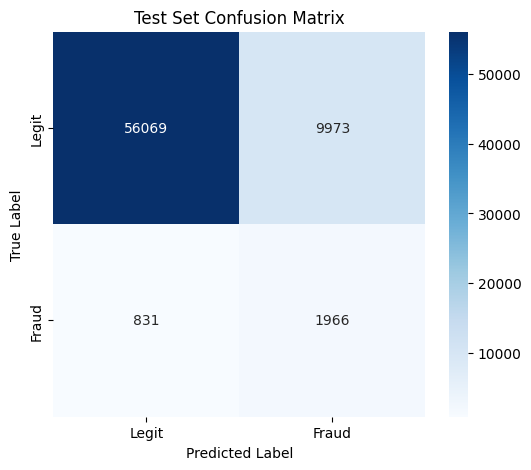

In [7]:
# --- Phase 4: Model Training and Evaluation (with Mini-Batching) ---
print("\n--- Phase 4: Training and Evaluation (with Mini-Batching) ---")

BATCH_SIZE = 8192
if NUM_GNN_LAYERS == 1: NUM_NEIGHBORS_PER_LAYER = [12] # MODIFIED (example)
elif NUM_GNN_LAYERS == 2: NUM_NEIGHBORS_PER_LAYER = [12, 8] # MODIFIED
elif NUM_GNN_LAYERS == 3: NUM_NEIGHBORS_PER_LAYER = [12, 8, 5] # MODIFIED (example)
else: # Fallback for more layers
    NUM_NEIGHBORS_PER_LAYER = [12, 8, 5] + [5] * (NUM_GNN_LAYERS - 3)

print(f"Using BATCH_SIZE: {BATCH_SIZE}")
print(f"NUM_NEIGHBORS_PER_LAYER for {NUM_GNN_LAYERS} layers: {NUM_NEIGHBORS_PER_LAYER}")

train_input_nodes = ('transaction', graph_data_obj['transaction'].train_mask)
val_input_nodes = ('transaction', graph_data_obj['transaction'].val_mask)
test_input_nodes = ('transaction', graph_data_obj['transaction'].test_mask)

NUM_WORKERS_LOADER = 2 if os.name == 'nt' else 2

train_loader = NeighborLoader(
    graph_data_obj, num_neighbors=NUM_NEIGHBORS_PER_LAYER,
    input_nodes=train_input_nodes, batch_size=BATCH_SIZE,
    shuffle=True, num_workers=NUM_WORKERS_LOADER, pin_memory=True if DEVICE.type == 'cuda' else False,
    replace=False # Default, sample without replacement
)
val_loader = NeighborLoader(
    graph_data_obj, num_neighbors=NUM_NEIGHBORS_PER_LAYER,
    input_nodes=val_input_nodes, batch_size=BATCH_SIZE * 2,
    shuffle=False, num_workers=NUM_WORKERS_LOADER, pin_memory=True if DEVICE.type == 'cuda' else False,
    replace=False
)
test_loader = NeighborLoader(
    graph_data_obj, num_neighbors=NUM_NEIGHBORS_PER_LAYER,
    input_nodes=test_input_nodes, batch_size=BATCH_SIZE * 2,
    shuffle=False, num_workers=NUM_WORKERS_LOADER, pin_memory=True if DEVICE.type == 'cuda' else False,
    replace=False
)

train_labels_full = graph_data_obj['transaction'].y[graph_data_obj['transaction'].train_mask]
pos_weight_tensor = None
if len(train_labels_full) > 0:
    n_pos = train_labels_full.sum().item()
    n_neg = len(train_labels_full) - n_pos
    if n_pos > 0 and n_neg > 0:
        weight = min(n_neg / n_pos, 100.0)
        pos_weight_tensor = torch.tensor([weight], device=DEVICE)
        print(f"Positive class weight: {pos_weight_tensor.item():.2f}")
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
# MODIFIED: Increased weight_decay
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10, factor=0.5, verbose=True)


def train_epoch(current_model, loader, current_optimizer, current_criterion):
    current_model.train()
    total_loss = 0
    num_batches = 0
    for batch in loader:
        batch = batch.to(DEVICE)
        current_optimizer.zero_grad()

        # Filter edge_index_dict for edges present in the current batch
        # and expected by the model
        batch_edge_index_dict = {
            edge_type: batch.edge_index_dict[edge_type]
            for edge_type in current_model.convs[0].convs.keys() # Get edge types from model def
            if edge_type in batch.edge_index_dict and batch.edge_index_dict[edge_type].numel() > 0
        }

        out_logits = current_model(batch.x_dict, batch_edge_index_dict)
        out_trans = out_logits['transaction']
        loss = current_criterion(out_trans[:batch['transaction'].batch_size],
                                 batch['transaction'].y[:batch['transaction'].batch_size])
        if torch.isnan(loss): print("NaN loss detected in training!"); continue
        loss.backward()
        current_optimizer.step()
        total_loss += loss.item()
        num_batches += 1
    return total_loss / num_batches if num_batches > 0 else 0

@torch.no_grad()
def evaluate_model(current_model, loader, current_criterion, threshold=0.5):
    current_model.eval()
    total_loss = 0
    all_probs, all_targets = [], []
    num_batches = 0
    if loader is None or not hasattr(loader, 'dataset') or len(loader.dataset) == 0 or not loader.input_nodes[1].any():
        print("Warning: Empty data loader or no input nodes for evaluation.")
        # Return structure consistent with normal path but indicating no data
        return 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, np.array([]), np.array([])


    for batch in loader:
        batch = batch.to(DEVICE)
        batch_edge_index_dict = {
            edge_type: batch.edge_index_dict[edge_type]
            for edge_type in current_model.convs[0].convs.keys() # Get edge types from model def
            if edge_type in batch.edge_index_dict and batch.edge_index_dict[edge_type].numel() > 0
        }
        out_logits = current_model(batch.x_dict, batch_edge_index_dict)
        out_trans = out_logits['transaction']

        batch_seed_logits = out_trans[:batch['transaction'].batch_size]
        batch_seed_labels = batch['transaction'].y[:batch['transaction'].batch_size]

        # Ensure batch_seed_labels is not empty before calculating loss
        if batch_seed_labels.numel() == 0:
            continue # Skip if this batch somehow has no labels (e.g. batch_size dropped to 0)

        loss = current_criterion(batch_seed_logits, batch_seed_labels).item()
        total_loss += loss
        num_batches += 1
        all_probs.append(torch.sigmoid(batch_seed_logits).cpu())
        all_targets.append(batch_seed_labels.cpu())

    if num_batches == 0: # No batches were processed
        print("Warning: No batches processed in evaluate_model.")
        return 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, np.array([]), np.array([])

    avg_loss = total_loss / num_batches
    if not all_probs: return avg_loss, 0.5, 0.0, 0.0, 0.0, 0.0, np.array([]), np.array([])

    probs_np = torch.cat(all_probs).numpy().flatten()
    targets_np = torch.cat(all_targets).numpy().flatten()

    # Handle cases where targets_np might be empty after filtering
    if len(targets_np) == 0:
        print("Warning: No targets available for metric calculation after processing batches.")
        return avg_loss, 0.5, 0.0, 0.0, 0.0, 0.0, np.array([]), np.array([])

    preds_np = (probs_np > threshold).astype(int)

    if len(np.unique(targets_np)) < 2:
        auc_roc = 0.5 # Default for single class
        # AUCPR can still be calculated if there's at least one positive or negative instance,
        # but its interpretation is tricky. sklearn handles this.
        auc_pr = average_precision_score(targets_np, probs_np)
    else:
        auc_roc = roc_auc_score(targets_np, probs_np)
        auc_pr = average_precision_score(targets_np, probs_np)

    precision = precision_score(targets_np, preds_np, zero_division=0)
    recall = recall_score(targets_np, preds_np, zero_division=0)
    f1 = f1_score(targets_np, preds_np, zero_division=0)
    return avg_loss, auc_roc, auc_pr, precision, recall, f1, preds_np, targets_np

# Training loop
EPOCHS = 150 # Reduced epochs for faster iteration, can be increased
PATIENCE_EARLY_STOPPING = 30 # Reduced patience slightly
best_val_aucpr = 0
best_epoch = 0
patience_counter = 0
model_save_path = 'best_hetero_gnn_fraud_batched_v2.pth' # New model name

print("Starting training with mini-batching...")
for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train_loss = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_auc_roc, val_auc_pr, val_precision, val_recall, val_f1, _, _ = evaluate_model(
        model, val_loader, criterion
    )
    epoch_duration = time.time() - epoch_start_time
    print(f'Epoch: {epoch:03d} | Time: {epoch_duration:.2f}s | LR: {optimizer.param_groups[0]["lr"]:.1e} | Train Loss: {train_loss:.4f} | '
          f'Val Loss: {val_loss:.4f} | Val AUCPR: {val_auc_pr:.4f} | Val F1: {val_f1:.4f}')

    scheduler.step(val_auc_pr)

    if val_auc_pr > best_val_aucpr:
        best_val_aucpr = val_auc_pr
        best_epoch = epoch
        patience_counter = 0
        torch.save(model.state_dict(), model_save_path)
        print(f"Epoch {epoch}: New best val AUCPR: {best_val_aucpr:.4f}. Model saved.")
    else:
        patience_counter += 1
    if patience_counter >= PATIENCE_EARLY_STOPPING:
        print(f"Early stopping at epoch {epoch}.")
        break

if os.path.exists(model_save_path):
    print(f"\nLoading best model from epoch {best_epoch} (Val AUCPR: {best_val_aucpr:.4f}).")
    model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))
else:
    print("\nNo best model found or saved. Using last epoch model for testing.")

test_loss, test_auc_roc, test_auc_pr, test_precision, test_recall, test_f1, test_preds, test_targets = evaluate_model(
    model, test_loader, criterion
)
print(f'\n--- Test Set Evaluation (Mini-Batching) ---')
print(f'Test Loss: {test_loss:.4f} | AUROC: {test_auc_roc:.4f} | AUCPR: {test_auc_pr:.4f}')
print(f'Test F1: {test_f1:.4f} | Precision: {test_precision:.4f} | Recall: {test_recall:.4f}')

if len(test_targets) > 0 and len(test_preds) > 0:
    cm = confusion_matrix(test_targets, test_preds)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
    plt.xlabel('Predicted Label'); plt.ylabel('True Label'); plt.title('Test Set Confusion Matrix')
    plt.savefig('test_confusion_matrix_batched_v2.png')
    print("Saved confusion matrix to test_confusion_matrix_batched_v2.png")

    fp_cost, fn_cost = 1, 100 # Example costs
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0,0,0,0) # Handle empty cm
    total_cost = (fp * fp_cost) + (fn * fn_cost)
    print(f"Total Estimated Financial Cost (Test): ${total_cost}") # Ensure TP/FP/FN/TN are integers
else:
    print("Test set empty or no predictions. Skipping CM and cost.")